# STOCK MARKET PREDICTION AND FORECASTING USING STACKED LSTM

In [66]:
#DATA COLLECTION
import pandas_datareader as pdr

In [67]:
key = '5e61a9a99d685803922ca472c5eeaf1f3fedf2a0'


In [68]:
import requests
import pandas as pd
from datetime import datetime, timedelta

# Set your Tiingo API key here
TIINGO_API_KEY = '5e61a9a99d685803922ca472c5eeaf1f3fedf2a0'

# Define the symbol and endpoint for the Tiingo API
symbol = 'TCS'
endpoint = f'https://api.tiingo.com/tiingo/daily/TCS/prices'

# Calculate start and end dates for the last five years
end_date = datetime.now().date()
#end_date = datetime(2020,5,22).date()
start_date = end_date - timedelta(days=5*365)  # Subtract 5 years' worth of days

# Set the parameters for the request
params = {
    'token': TIINGO_API_KEY,
    'startDate': start_date,
    'endDate': end_date
}

# Send the GET request to the Tiingo API
response = requests.get(endpoint, params=params)

# Check if the request was successful
if response.status_code == 200:
    # Convert the response JSON data to a pandas DataFrame
    data = response.json()
    df = pd.DataFrame(data)
    
    # Print the first few rows of the DataFrame
    print(df.head())
else:
    # Print an error message if the request failed
    print('Failed to retrieve data from Tiingo API')


                       date  close  high     low  open  volume  adjClose   
0  2019-05-07T00:00:00.000Z   8.86  9.06  8.7548  8.95  220417  8.335887  \
1  2019-05-08T00:00:00.000Z   8.96  9.06  8.7500  8.89  306662  8.429972   
2  2019-05-09T00:00:00.000Z   8.86  9.01  8.7300  8.85  313394  8.335887   
3  2019-05-10T00:00:00.000Z   8.85  9.09  8.7800  8.79  389243  8.326479   
4  2019-05-13T00:00:00.000Z   8.52  8.68  8.4300  8.66  239240  8.016000   

    adjHigh    adjLow   adjOpen  adjVolume  divCash  splitFactor  
0  8.524056  8.236910  8.420563     220417      0.0          1.0  
1  8.524056  8.232394  8.364113     306662      0.0          1.0  
2  8.477014  8.213577  8.326479     313394      0.0          1.0  
3  8.552282  8.260620  8.270028     389243      0.0          1.0  
4  8.166535  7.931324  8.147718     239240      0.0          1.0  


In [69]:
df.to_csv('AAPL.csv')

In [70]:
import pandas as pd

In [71]:
df=pd.read_csv('AAPL.csv')

In [72]:
df.head()

,Unnamed: 0,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,2019-05-07T00:00:00.000Z,8.86,9.06,8.7548,8.95,220417,8.335887,8.524056,8.236910,8.420563,220417,0.0,1.0
1,1,2019-05-08T00:00:00.000Z,8.96,9.06,8.7500,8.89,306662,8.429972,8.524056,8.232394,8.364113,306662,0.0,1.0
2,2,2019-05-09T00:00:00.000Z,8.86,9.01,8.7300,8.85,313394,8.335887,8.477014,8.213577,8.326479,313394,0.0,1.0
3,3,2019-05-10T00:00:00.000Z,8.85,9.09,8.7800,8.79,389243,8.326479,8.552282,8.260620,8.270028,389243,0.0,1.0
4,4,2019-05-13T00:00:00.000Z,8.52,8.68,8.4300,8.66,239240,8.016000,8.166535,7.931324,8.147718,239240,0.0,1.0


In [73]:
df.tail()

,Unnamed: 0,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,1253,2024-04-29T00:00:00.000Z,0.8800,0.9296,0.8654,0.8654,174939,0.8800,0.9296,0.8654,0.8654,174939,0.0,1.0
1254,1254,2024-04-30T00:00:00.000Z,0.8420,0.9080,0.8301,0.8800,319841,0.8420,0.9080,0.8301,0.8800,319841,0.0,1.0
1255,1255,2024-05-01T00:00:00.000Z,0.8517,0.8700,0.8400,0.8400,116625,0.8517,0.8700,0.8400,0.8400,116625,0.0,1.0
1256,1256,2024-05-02T00:00:00.000Z,0.9100,0.9390,0.8500,0.8500,143383,0.9100,0.9390,0.8500,0.8500,143383,0.0,1.0
1257,1257,2024-05-03T00:00:00.000Z,0.8900,0.9637,0.8899,0.9100,139080,0.8900,0.9637,0.8899,0.9100,139080,0.0,1.0


In [74]:
df1=df.reset_index()['close']

In [75]:
df1

0       8.8600
1       8.9600
2       8.8600
3       8.8500
4       8.5200
         ...  
1253    0.8800
1254    0.8420
1255    0.8517
1256    0.9100
1257    0.8900
Name: close, Length: 1258, dtype: float64

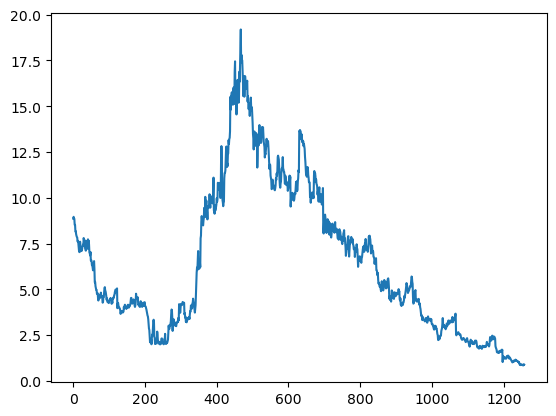

In [76]:
import matplotlib.pyplot as plt
plt.plot(df1)

### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [77]:
import numpy as np

In [78]:
df1

0       8.8600
1       8.9600
2       8.8600
3       8.8500
4       8.5200
         ...  
1253    0.8800
1254    0.8420
1255    0.8517
1256    0.9100
1257    0.8900
Name: close, Length: 1258, dtype: float64

In [79]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [80]:
print(df1)

[[0.43699586]
 [0.44244604]
 [0.43699586]
 ...
 [0.00052867]
 [0.00370613]
 [0.00261609]]


In [81]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [82]:
training_size,test_size

(817, 441)

In [83]:
train_data

array([[0.43699586],
       [0.44244604],
       [0.43699586],
       [0.43645084],
       [0.41846523],
       [0.41846523],
       [0.39884456],
       [0.39938958],
       [0.39066928],
       [0.38576412],
       [0.382494  ],
       [0.38085895],
       [0.36886854],
       [0.37104862],
       [0.36505341],
       [0.35251799],
       [0.34161761],
       [0.33725747],
       [0.33780249],
       [0.36832352],
       [0.353063  ],
       [0.35088293],
       [0.34652278],
       [0.34052758],
       [0.34270765],
       [0.34924787],
       [0.3557881 ],
       [0.35960323],
       [0.35633312],
       [0.37922389],
       [0.37377371],
       [0.37104862],
       [0.37268367],
       [0.34870286],
       [0.34543274],
       [0.34161761],
       [0.34815784],
       [0.353063  ],
       [0.37104862],
       [0.35469806],
       [0.34761282],
       [0.37540876],
       [0.36396337],
       [0.37159363],
       [0.35960323],
       [0.33616743],
       [0.33398736],
       [0.327

In [84]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [85]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [86]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [87]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [88]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [89]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [90]:
import warnings
warnings.filterwarnings('ignore')

In [91]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

2024-05-05 14:34:55.283147: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-05 14:34:55.283825: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-05 14:34:55.284259: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [92]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [93]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100


2024-05-05 14:34:55.600792: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-05 14:34:55.601594: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-05 14:34:55.602328: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

11/12 [==========================>...] - ETA: 0s - loss: 0.0811

2024-05-05 14:34:57.924998: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-05 14:34:57.925529: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-05 14:34:57.926112: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

12/12 [==============================] - 3s 105ms/step - loss: 0.0800 - val_loss: 0.0190
Epoch 2/100
12/12 [==============================] - 1s 71ms/step - loss: 0.0123 - val_loss: 0.0135
Epoch 3/100
12/12 [==============================] - 1s 75ms/step - loss: 0.0061 - val_loss: 0.0021
Epoch 4/100
12/12 [==============================] - 1s 70ms/step - loss: 0.0034 - val_loss: 6.8989e-04
Epoch 5/100
12/12 [==============================] - 1s 70ms/step - loss: 0.0028 - val_loss: 3.2820e-04
Epoch 6/100
12/12 [==============================] - 1s 71ms/step - loss: 0.0028 - val_loss: 3.8843e-04
Epoch 7/100
12/12 [==============================] - 1s 71ms/step - loss: 0.0027 - val_loss: 7.6269e-04
Epoch 8/100
12/12 [==============================] - 1s 74ms/step - loss: 0.0025 - val_loss: 6.8244e-04
Epoch 9/100
12/12 [==============================] - 1s 72ms/step - loss: 0.0024 - val_loss: 5.0142e-04
Epoch 10/100
12/12 [==============================] - 1s 72ms/step - loss: 0.0024 - val

In [94]:
import tensorflow as tf

In [95]:
tf.__version__

'2.12.0'

In [96]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

2024-05-05 14:36:26.672917: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-05 14:36:26.673455: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-05 14:36:26.674037: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

11/11 [==============================] - 0s 10ms/step


In [97]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [98]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

8.752116703039196

In [99]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

2.7863679766643332

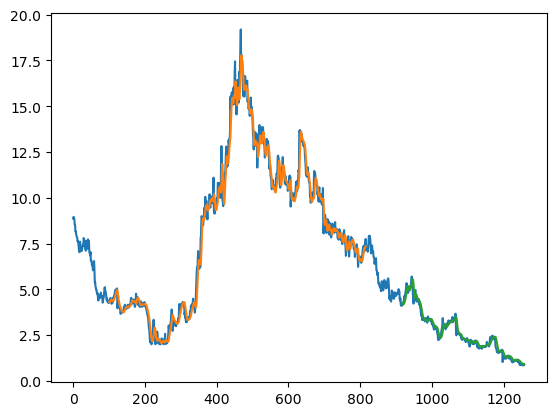

In [100]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [101]:
len(test_data)

441

In [102]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [103]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [104]:
temp_input

[0.06038805319380858,
 0.05657292347939828,
 0.06038805319380858,
 0.07183344233703946,
 0.08436886854153042,
 0.07564857205144974,
 0.08218879441901025,
 0.07401351645955963,
 0.08327883148027032,
 0.08055373882712011,
 0.08872901678657075,
 0.08164377588838018,
 0.07782864617396991,
 0.07837366470459994,
 0.08600392413342053,
 0.08382385001090034,
 0.08545890560279049,
 0.08218879441901025,
 0.08000872029649009,
 0.05766296054065838,
 0.05330281229561805,
 0.050577719642467836,
 0.04730760845868759,
 0.03967734902986701,
 0.03913233049923698,
 0.03913233049923698,
 0.038042293437976896,
 0.04131240462175714,
 0.03858731196860693,
 0.03749727490734685,
 0.040767386091127095,
 0.043492478744277294,
 0.042402441683017225,
 0.043492478744277294,
 0.04294746021364726,
 0.04022236756049706,
 0.046762589928057555,
 0.042402441683017225,
 0.046762589928057555,
 0.010246348375844781,
 0.027141922825376072,
 0.027141922825376072,
 0.024961848702855893,
 0.02005668192718553,
 0.0227817745803357

In [105]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.00427676]
101
1 day input [0.05657292 0.06038805 0.07183344 0.08436887 0.07564857 0.08218879
 0.07401352 0.08327883 0.08055374 0.08872902 0.08164378 0.07782865
 0.07837366 0.08600392 0.08382385 0.08545891 0.08218879 0.08000872
 0.05766296 0.05330281 0.05057772 0.04730761 0.03967735 0.03913233
 0.03913233 0.03804229 0.0413124  0.03858731 0.03749727 0.04076739
 0.04349248 0.04240244 0.04349248 0.04294746 0.04022237 0.04676259
 0.04240244 0.04676259 0.01024635 0.02714192 0.02714192 0.02496185
 0.02005668 0.02278177 0.02441683 0.02169174 0.02114672 0.02005668
 0.0206017  0.02387181 0.02768694 0.02441683 0.02877698 0.029322
 0.02877698 0.0265969  0.0206017  0.02278177 0.02387181 0.02169174
 0.01896664 0.01678657 0.01569653 0.01297144 0.01133639 0.00915631
 0.00970133 0.01079137 0.01242642 0.0146065  0.0118814  0.01297144
 0.01406148 0.01624155 0.01733159 0.01515152 0.01406148 0.0146065
 0.01406148 0.01297144 0.0118814  0.01024635 0.01133639 0.00844779
 0.00915631 0.00398954 0.00222368 0.

In [106]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [107]:
import matplotlib.pyplot as plt

In [108]:
len(df1)

1258

In [109]:
df3=df1.tolist()
df3.extend(lst_output)

In [110]:
day_new.shape,scaler.inverse_transform(df1[1158:]).shape

((100,), (100, 1))

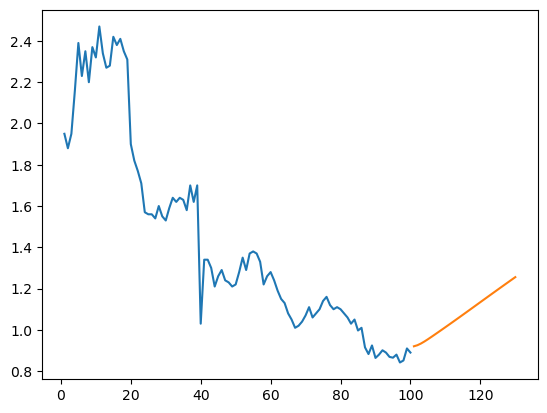

In [111]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

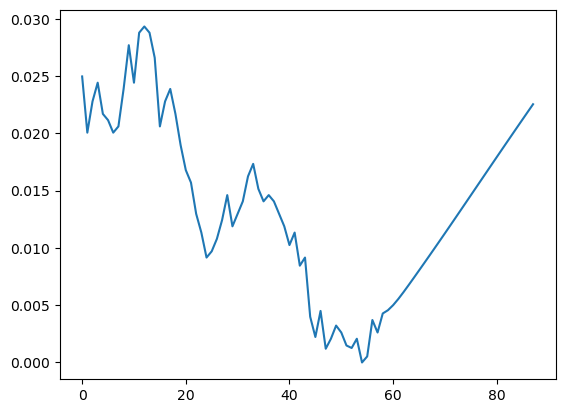

In [112]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [113]:
df3=scaler.inverse_transform(df3).tolist()

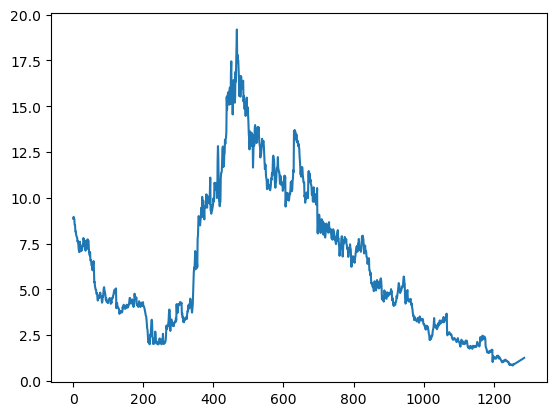

In [114]:
plt.plot(df3)